<a href="https://colab.research.google.com/github/jabir-al-nahian/bangla-slang-detection/blob/main/bangla_slang_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
import pandas.core.algorithms as algos
pd.pandas.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news_data=pd.read_csv("/content/drive/MyDrive/Boot-Camp-3/Dataset.csv")

In [ ]:
news_data

,Sentence,Type
0,যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n,No
1,আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন,No
2,আলহামদুলিল্লাহ ভালো সিদ্ধান্ত,No
3,আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...,No
4,হিরো আলমের বউ ক্ষেপতেসো ক্যান?,Yes
...,...,...
3014,ছাগলের বাচ্চা সিয়াম,yes
3015,নাছিরের ধন অনেক বড় তাই মেয়েটা পাগল হয়ে গেছে,yes
3016,বুকা ভারতের সাথে শেষ বলে একটা রান করতে পারলে,yes
3017,এ মালাউনের মুখে জুতা মারেন সবাই,yes


In [ ]:
news_data.shape

(3019, 2)

In [ ]:
news_data.isnull().sum()

Sentence    0
Type        3
dtype: int64

In [ ]:
news_data = news_data.fillna('')

In [ ]:
news_data.isnull().sum()

Sentence    0
Type        0
dtype: int64

In [ ]:
news_data['content'] = news_data['Sentence']

In [ ]:
print(news_data['content'])

0                 যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n
1           আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন
2                           আলহামদুলিল্লাহ ভালো সিদ্ধান্ত
3       আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...
4                          হিরো আলমের বউ ক্ষেপতেসো ক্যান?
                              ...                        
3014                                  ছাগলের বাচ্চা সিয়াম
3015          নাছিরের ধন অনেক বড় তাই মেয়েটা পাগল হয়ে গেছে
3016        বুকা ভারতের সাথে শেষ বলে একটা রান করতে পারলে 
3017                    এ মালাউনের মুখে জুতা মারেন সবাই  
3018    ইউটিউবার দেখছি এমন বক্সচুদ ইউটিউবার তো দেখি না...
Name: content, Length: 3019, dtype: object


In [ ]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='Type', axis=1)
## Get the Dependent features
Y = news_data['Type']

In [ ]:
Y.value_counts()

Yes    1621
No     1178
yes     217
          3
Name: Type, dtype: int64

In [ ]:
X.shape

(3019, 2)

In [ ]:
Y.shape

(3019,)

In [ ]:
print(X)
print(Y)

                                               Sentence  \
0               যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n   
1         আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন   
2                         আলহামদুলিল্লাহ ভালো সিদ্ধান্ত   
3     আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...   
4                        হিরো আলমের বউ ক্ষেপতেসো ক্যান?   
...                                                 ...   
3014                                ছাগলের বাচ্চা সিয়াম   
3015        নাছিরের ধন অনেক বড় তাই মেয়েটা পাগল হয়ে গেছে   
3016      বুকা ভারতের সাথে শেষ বলে একটা রান করতে পারলে    
3017                  এ মালাউনের মুখে জুতা মারেন সবাই     
3018  ইউটিউবার দেখছি এমন বক্সচুদ ইউটিউবার তো দেখি না...   

                                                content  
0               যা‌দের মন সুন্দর তা‌দের ছ‌বিও সুন্দর।\n  
1         আল্লাহ সুবহানাহু ওয়াতাআ'লা নেক হায়াৎ দান করুন  
2                         আলহামদুলিল্লাহ ভালো সিদ্ধান্ত  
3     আপনাকে নিচে নামানোর জন্য অনেকেই অনেক কিছু বলবে...  
4

In [ ]:
#separating the data and label
X = news_data['content'].values
Y = news_data['Type'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Logistic**

In [ ]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8405797101449275


accuracy:   0.796


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


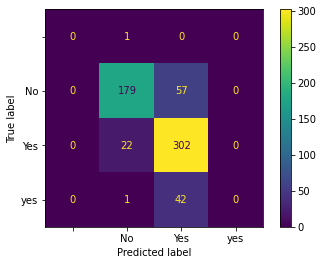

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import mlxtend
import itertools

model.fit(X_train, Y_train)
prediction = model.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(model, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.88      0.76      0.82       236
         Yes       0.75      0.93      0.83       324
         yes       0.00      0.00      0.00        43

    accuracy                           0.80       604
   macro avg       0.41      0.42      0.41       604
weighted avg       0.75      0.80      0.77       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multinomial Naive **Bayes**

In [ ]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.791


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


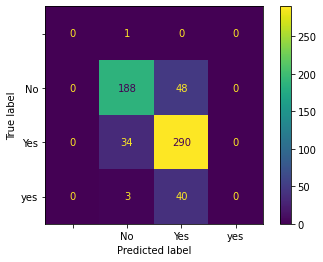

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, Y_train)
prediction1 = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction1)
plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

In [ ]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['Yes']
The news is Fake


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.83      0.80      0.81       236
         Yes       0.77      0.90      0.83       324
         yes       0.00      0.00      0.00        43

    accuracy                           0.79       604
   macro avg       0.40      0.42      0.41       604
weighted avg       0.74      0.79      0.76       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,Y_train)

RandomForestClassifier()

accuracy:   0.768


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


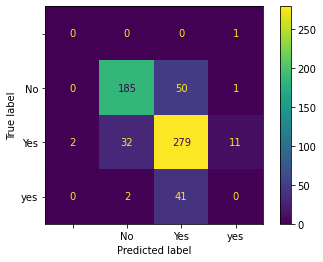

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

rfmodel.fit(X_train, Y_train)
prediction2 = rfmodel.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction2)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction2)
plot_confusion_matrix(rfmodel, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.84      0.78      0.81       236
         Yes       0.75      0.86      0.80       324
         yes       0.00      0.00      0.00        43

    accuracy                           0.77       604
   macro avg       0.40      0.41      0.40       604
weighted avg       0.73      0.77      0.75       604



# **SVM**

In [ ]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(X_train,Y_train)

SVC()

accuracy:   0.768


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


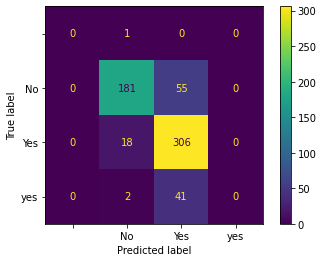

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

smodel.fit(X_train, Y_train)
prediction3 = rfmodel.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction3)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction3)
plot_confusion_matrix(smodel, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.84      0.78      0.81       236
         Yes       0.75      0.86      0.80       324
         yes       0.00      0.00      0.00        43

    accuracy                           0.77       604
   macro avg       0.40      0.41      0.40       604
weighted avg       0.73      0.77      0.75       604



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
l= LabelEncoder()
Y_train = l.fit_transform(Y_train)

In [ ]:
Y_train

array([1, 2, 2, ..., 1, 2, 2])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn.predict(X_test)

array([1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
knn.score(X_train,Y_train)

0.7060041407867494

In [ ]:
Y_test = l.fit_transform(Y_test)
Y_test

array([1, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 3, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2,
       3, 1, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 2, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       3, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       3, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 1,

In [ ]:
knn.score(X_test,Y_test)

0.609271523178808

**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn1= KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train,Y_train)
knn1.predict(X_test)

array([1.33333333, 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 1.        , 1.66666667, 2.33333333,
       2.        , 2.        , 1.66666667, 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 1.66666667,
       2.        , 2.33333333, 2.        , 1.66666667, 1.33333333,
       1.        , 1.66666667, 2.        , 2.        , 1.66666667,
       2.33333333, 2.        , 2.        , 2.        , 2.        ,
       1.33333333, 2.        , 2.        , 2.        , 2.33333333,
       1.33333333, 2.        , 2.33333333, 2.        , 2.        ,
       1.33333333, 1.33333333, 1.66666667, 2.        , 2.        ,
       2.        , 1.66666667, 2.        , 2.        , 2.        ,
       1.33333333, 2.        , 2.        , 2.33333333, 2.33333333,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.33333333, 2.33333333, 1.33333333, 2.        , 2.        ,
       2.        , 2.        , 2.33333333, 2.33333333, 2.     

In [ ]:
knn1.score(X_train,Y_train)

0.5358235838253931

In [ ]:
knn1.score(X_test,Y_test)

-0.07109388734741318

**Gradient Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(n_estimators=3)
GBC.fit(X_train,Y_train)
GBC.predict(X_test)

array([1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,

In [ ]:
GBC.score(X_train,Y_train)

0.7047619047619048

In [ ]:
GBC.score(X_test,Y_test)

0.6854304635761589

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=3)
GB.fit(X_train,Y_train)
GB.predict(X_test)

array([1.54847592, 1.54847592, 1.71928865, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.54847592, 1.71928865, 1.71928865,
       1.51757666, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.51757666,
       1.51757666, 1.54847592, 1.54847592, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.51757666, 1.71928865, 1.51757666, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.54847592, 1.71928865, 1.71928865, 1.71928865, 1.71928865,
       1.52572547, 1.71928865, 1.51757666, 1.71928865, 1.71928865,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.54847592,
       1.71928865, 1.88155331, 1.71928865, 1.71928865, 1.51757666,
       1.71928865, 1.71928865, 1.71928865, 1.71928865, 1.71928

In [ ]:
GB.score(X_train,Y_train)

0.11094385106365501

In [ ]:
GB.score(X_test,Y_test)

0.09301234053873975

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
regressor.predict(X_test)

array([1.        , 1.        , 2.        , 1.15      , 1.4       ,
       1.9       , 1.95      , 1.1       , 2.        , 2.5       ,
       1.        , 1.8       , 1.70138889, 2.05      , 2.05      ,
       1.9       , 2.1       , 1.60228237, 1.05      , 1.05      ,
       1.85      , 2.30879351, 2.        , 1.85      , 1.        ,
       1.        , 1.        , 1.4       , 1.6       , 2.15      ,
       2.25      , 2.        , 2.15      , 2.        , 1.25      ,
       1.1       , 1.6       , 1.        , 1.75      , 2.05      ,
       1.05      , 2.05      , 2.23444138, 1.05      , 1.15      ,
       1.05      , 1.75048215, 2.05      , 1.94726264, 2.0477798 ,
       1.2       , 1.3       , 1.75      , 1.25      , 1.05      ,
       1.        , 1.85      , 1.        , 1.95      , 1.95      ,
       1.05      , 2.        , 1.9       , 1.7449516 , 1.7       ,
       2.53833333, 2.2       , 2.05      , 2.        , 1.15      ,
       1.77597222, 2.        , 1.7       , 2.55      , 1.94370

In [ ]:
regressor.score(X_train,Y_train)

0.8647859360951407

In [ ]:
regressor.score(X_test,Y_test)

0.27071922294977324

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit( X_train, Y_train)

LinearRegression()

In [ ]:
regressor.score (X_train, Y_train)

0.7373102044742237

In [ ]:
regressor.score (X_test, Y_test)

-0.07372119898236384